# Final Report: On Gig Economy

## Introduction

When one googles gig economy in December 2019, the first featured definition suggested is, "a gig economy is a free market system in which temporary positions are common and organizations contract with independent workers for short-term engagements. The term "gig" is a slang word meaning "a job for a specified period of time" and is typically used in referring to musicians" (Rouse). But what does it mean to a general population? Gigs certainly has transcended the world of musicians to include many different jobs and contract for independent workers is not just for specialized consultants or freelancers but include a growing number of side-hustlers that do anything from resume reviews to dog sitting or from ride sharing to website design. 

While the concept of gigs or freelance work is not new, digital platforms such Uber or Fiverr coupled with the rising acceptance of sharing economy and need for flexible work and side hustle, are driving an economic phenomenon. The scale and types of jobs are changing and so is people’s understanding of the term. In the report, the interpretation and sentiments around gig economy is explored using data from a popular online platform, Twitter. In addition, data from Federal Reserve Board’s Survey of Household Economics and Decisionmaking (SHED) is used to quantify how many people work part time, why and what kind of part time jobs have risen.

## Understanding the Sign Vehicle 'Gig Economy'

Even before looking at the patterns from online conversations, just looking at the questions on the SHED data from 2013 to 2018 reveals that side hustles undeniably form a big part of economic transactions. In 2013, the survey asked no question about an additional job and included part time for someone else and independent contractor or consultant as an option for their main job. However, as a stark contrast in 2018 the survey asks if they have an additional job, and explicitly asks the respondents if they have done jobs such as housecleaning, yardwork, ride sharing, online video posting, deliveries, selling goods online or in-person or rented out property. This probe to determine the scale of participation in such work and motivation for doing so, is an indication that is it gig jobs are starting to form an integral part of economic life to give rise to new ways of earning and towards a transforming way of flexible living. It is not just necessity that dictates participation in alternative means of earning, it a choice. 

Prevalence of gig economy certainly impacts economic institutions and work conventions but new questions of law, social norms and acceptability, one’s habits and lifestyles are on the rise. E.B. Taylor describes culture as “that complex whole which includes knowledge, belief, art, morals, law, custom, and any other capabilities and habits acquired by man as a member of society” (Lecture 1). As the idea of gig economy becomes a norm, beliefs such as a “a good 9-5 job is right, stable choice” or “an educated person cannot also work as cab driver” also see transformation. Technology and market demands give rise to opportunities to get temporary jobs, but it is through knowledge shared and status afforded by media, peers, influencers, employers etc. through semiotic means that makes it a part of one’s life and society as a whole. As a term like “gig economy” becomes part of mainstream conversations, it legitimizes this new way of working as a part of today’s culture. 

‘Gig economy’ can be considered a conventionalized pattern as the term alone holds some meaning – that is why it is a hashtag that drives conversations on a daily basis. It is not just contained to one region but as seen in the map below, generated by mapping the location of tweets collected in one week ([see assignment 2/project proposal](https://github.com/dhruvalb/culturepattern_gigeconomy/blob/master/Reports/Project%20Proposal.ipynb), it is used across the world. Also seen in the results of google search terms, it is a growing search term that probably influences how people work or at least how they view work. 

Map of Locations of Tweets with #gigeconomy
[Tweet%20Map](https://github.com/dhruvalb/culturepattern_gigeconomy/blob/master/Reports/Tweet%20Map.PNG)

Trend in Gig Economy
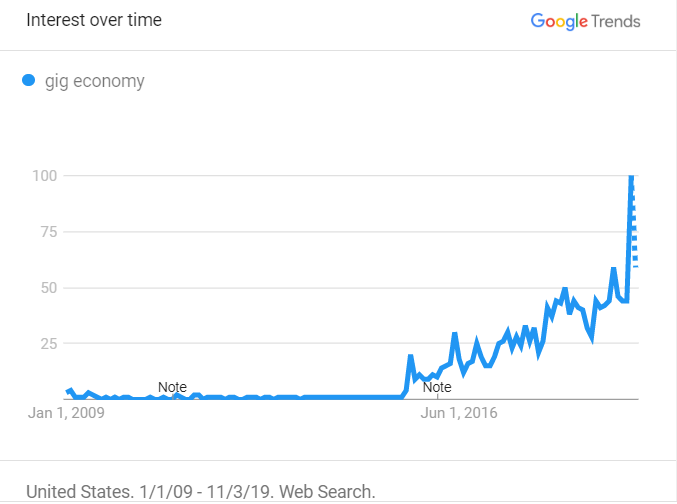



As mentioned in the introduction, officially gig economy can include any short-term independantly contracted job. This has been around for many years and it is not a new phenomenon. However, those independent jobs were limited in scale and tendeded to be specialized jobs such as consulting or freelance writing. However, now, the words "gig economy", are point to an increasing trend of people maybe working as a freelance professionals in consulting, writing, programming, designing etc but more so the trend of people picking up side hustles such as food delivery, ridesharing, renting out space and making money by creating and selling goods and services independently. In Piercian terms, it is a dicent symbolic legisign. That is, it is a "conventional sign" recognizable by people through the words that provide a means to interpretation (Buchler 102).   

The question does remain, conventionally how do people interpret 'gig economy'? Is it fair to say that in a conversation if gig economy is mentioned, it is likely that they are referring to one of the newer, app/website based hustles not the classic freelance jobs?

## Analysis 

#### Twitter
Twitter data with the filter #gigeconomy is collected weekly from November 1, 2019 to December 11, 2019 giving a total of 5339 unique tweets. The data collection code and data for twitter can be found [here](https://github.com/dhruvalb/culturepattern_gigeconomy/tree/master/Data/Twitter)

In [1]:
#Import packages
import pandas as pd
import numpy as np
import re

import nltk
import itertools
import collections

import matplotlib.pyplot as plt
import seaborn as sns
import demoji

import warnings; warnings.simplefilter('ignore')

In [2]:
#Read the full combined dataset with all tweets and display sample entries
tweet_data = pd.read_csv("Data/Twitter/full_tweet_df.csv", encoding ='utf-8')
tweet_data.head()

,user,location,tweet text,tweet date
0,jamie_mo,PA,RT @SharksSchatzi: Where are the stores that s...,11/11/2019 3:23
1,AntlerAustralia,"Sydney, New South Wales","RT @getupcover: Skye Theodorou, our CEO, unvei...",11/11/2019 2:56
2,GusRazzetti,"Chicago, IL",The growth of the #gigeconomy is a global tren...,11/11/2019 2:42
3,gdprAI,"England, United Kingdom","RT @LewisGarrad: How is #AI, globalization, an...",11/11/2019 2:00
4,LewisGarrad,Singapore,"How is #AI, globalization, and the #gigeconomy...",11/11/2019 2:00


In [3]:
# Define Functions - To clean up tweet text 
def CleanTweet(tweet):
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(//[^\s]+))', '', tweet) # remove URLs
    tweet = demoji.replace(tweet) #remove emojis
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    #username is usually removed but it is included as some business names are tagged with @
    tweet = re.sub(r'@([^\s]+)', r'\1', tweet) # remove the @ in Username
    tweet = re.sub(r'([^\s]+):', r'\1', tweet) # remove the : in Username
    tweet.replace('rt', '') #remove RT
    tweet = tweet.strip()
    return tweet

In [4]:
# Apply Clean and Tokenize function to tweet_data
tweet_data['text'] = tweet_data['tweet text'].apply(CleanTweet) #To Keep original tweets, make a new column with cleaned data
tweet_data.drop_duplicates(subset ="text", keep = 'first', inplace = True) #Make sure there are no duplicates

##### FINDING THE MOST FREQUENT WORDS

In [5]:
# Define function to tokenize tweets for word-level analysis
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords

#In addition to the standard words, the hash tag, gigeconomy, rt for retweet, amp with &, and some lingering puntuation that came up
#during analsyis are removed.
stop = stopwords.words('english') + list(punctuation) + ['amp','RT', 'rt','gigeconomy', '’', '’s', '``', "'s", "n't", '…', "''", '...']

def Tokenize(tweet):
    tokens = [i for i in nltk.word_tokenize(tweet.lower()) if i not in stop]
    return tokens

# Given that top words that show up are not verbs that need to lemmetized, that process is not done.

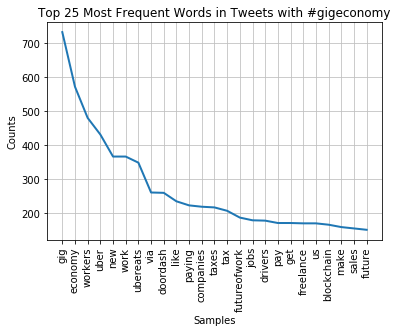

In [6]:
# A list of words is created and combined after tokenizing the text
word_list = tweet_data['text'].apply(Tokenize)

full_word_list = []
for i in word_list:
    full_word_list.extend(i)

# Top 25 most frequent words
fd = nltk.FreqDist(word for word in full_word_list)
fd.plot(25, title = 'Top 25 Most Frequent Words in Tweets with #gigeconomy');

Observations: Just looking at the most frequent words, some interesting ones include: uber, new, ubereats/doordash, taxes, future/futureofwork. All of these seem to indicate that a large part of the conversation is dominated by "new-age gigs" that are app/tech based. Freelance and sales do make it to the chart but they are not that high up.  

##### SEPERATING FREQUENT WORDS BY PART OF SPEECH

Following the methodology presented in class, an analysis with different parts of speech is done to see how which adjectives and which nouns dominate and if any new trends are percieved.

In [7]:
#Code Reference: Dr. Clindaniel's Class Notes

#Function to tag each word with a part of speech
def pos_tag(text):
    import string
    # Define stop words--common words like "the"--and punctuation to drop from analysis
    #Additional domain specific words are added
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['amp', 'RT', 'rt','gigeconomy', '’', '’s', '``', "'s", "n't", '…', "''", '...']
    
    # Tokenize words using nltk.word_tokenize, remove stop words
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    
    # Label parts of speech automatically using NLTK
    pos_tagged = nltk.pos_tag(tokens)
    return pos_tagged

# Apply function
pos_tagged_captions = tweet_data['text'].apply(pos_tag)

# Extend list so that it contains all words/parts of speech for all entries
pos_tagged_captions_full = []
for i in pos_tagged_captions:
    pos_tagged_captions_full.extend(i)

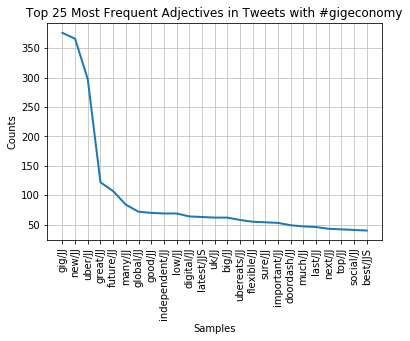

In [8]:
# Plot top adjectives using nltk's built-in Freq. distn. calculator and plotting function (http://nltk.sourceforge.net/doc/en/ch03.html)
fd = nltk.FreqDist(word + "/" + tag for (word, tag) in pos_tagged_captions_full if tag[:2] == 'JJ')
fd.plot(25, title = 'Top 25 Most Frequent Adjectives in Tweets with #gigeconomy');

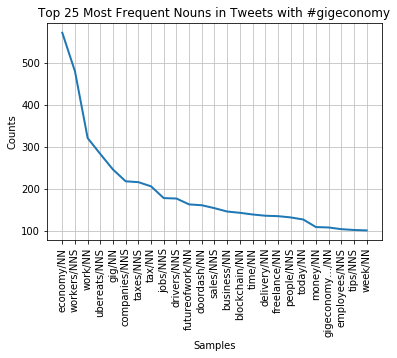

In [9]:
# Plot top nouns using nltk's built-in Freq. distn. calculator and plotting function (http://nltk.sourceforge.net/doc/en/ch03.html)
fd = nltk.FreqDist(word + "/" + tag for (word, tag) in pos_tagged_captions_full if tag[:2] == 'NN')
fd.plot(25, title = 'Top 25 Most Frequent Nouns in Tweets with #gigeconomy');

Observations:Nothing new is revealed by looking at the subset of nouns but the adjectives do have some interesting ones. There are words that indicate that the benefits of gig economy would be things like to work independently, flexible schedule, ability to be social. The words important, future and digital are also noteworthy. Overall sentiment seems positive as words like great, good, best, important etc. show up in the top 25. 

##### SENTIMENT ANALYSIS

The adjectives do reveal an overall leaning towards positive sentiment, a polarity based sentiment analysis is conducted to get a better picture. 

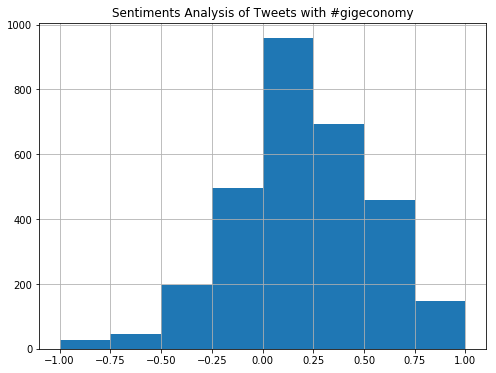

In [10]:
#Using the package Textblob, the polarity or sentiment of the tweet text is evaluated.
#Reference used: https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/analyze-tweet-sentiments-in-python/

from textblob import TextBlob

# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweet_data['text']]

# Create list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head()

# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax)

plt.title("Sentiments Analysis of Tweets with #gigeconomy")
plt.show()

Observations: While most tweets cluster around 0, more tweets have a positive sentiment than negative. 

#### Survey of Household Economics and Decision Making

The Federal Reserve Board has provided a rich data that details economic decision making for respondants. The data spans from 2013 to 2018 and the data as well as the codebook can be found [here](https://github.com/dhruvalb/culturepattern_gigeconomy/tree/master/Data/SHED) .
The biggest challenge with this data set is that it is not easily comparable over time as the questions have changed significantly. However, reviewing the type of questions do reveal how economic priorities are changed.

In [11]:
#Load Data
df_18 = pd.read_csv('Data/SHED/2018_data.csv', encoding = "ISO-8859-1")
df_13 = pd.read_csv('Data/SHED/2013_data.csv', encoding = "ISO-8859-1")

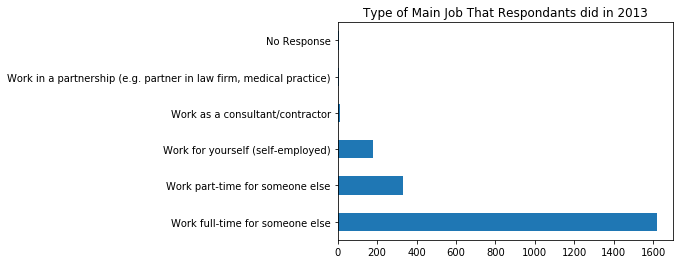

In [12]:
#The Information on the respondants main job is plotted for 2013

main_job_13 = pd.DataFrame(df_13['D3'].value_counts()) #count the values
main_job_13 = main_job_13.rename(index={1.0:'Work full-time for someone else', 
                            2.0:'Work part-time for someone else', 
                            3.0:'Work for yourself (self-employed)', 
                            4.0:'Work in a partnership (e.g. partner in law firm, medical practice)',
                            5.0:'Work as a consultant/contractor', 
                            -1.0: 'No Response'})
main_job_13['D3'].plot('barh', title = "Type of Main Job That Respondants did in 2013") #plot

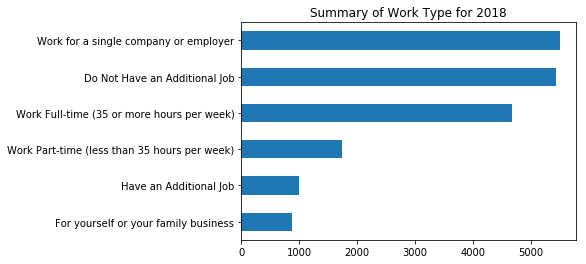

In [13]:
#Summary of the responses on work type are loaded from a csv file created from information in codebook
work_summary_18 = pd.read_csv('Data/SHED/2018_WorkSummary.csv', index_col=0) #load data
work_summary_18['Value'].sort_values().plot('barh', title="Summary of Work Type for 2018") #plot

Observation: Since the focus of this study is to understand, a recent trend, only 2018 data is looked into in depth. However, as a quick comparison, the oldest data available, 2013 data is used to see how the work habit has changed. In this data, most people work for others and there is not question for additional job. Interestingly, consultant/contractor is one of the choices. The questions on type of work has become much more detailed in 2018 with additional job and subsequent questions gaining prominence.

In [14]:
#For ease of Analysis, remove columns that are not needed to create a reduced dataframe
keep_cols = ['CaseID', 'weight2b', 'D1A', 'D1E','D21_a','D21_b','D21_c','D21_d','D21_e','D21_f','D21_g',
             'D3A', 'D3B', 'D20', 'D33','D4', 'D6_a', 'D6_b', 'D6_c','D44_a','D44_b','D44_c','D44_d',
             'D44_e','D44_f','D5','GE1_a','GE1_b','GE1_c','GE1_d','GE1_e','GE1_f','GE2_a','GE2_b','GE2_c',
             'GE2_d','GE2_e','GE10_a','GE10_b','GE10_c','GE10_d','GE10_e','GE10_f','GE10_g','GE10_Refused','GE11','GE5']
reduced_18 = df_18[keep_cols]

In [15]:
#In addition to your main job, did you have any other jobs last month? 
#(To get a numerical count of people with additional jobs.)
reduced_18['D4'].value_counts()

No         5427
Yes         998
Refused      15
Name: D4, dtype: int64

In [16]:
# To understand the activities that people do as an additional job, columns GE1a-f are plotted. 
# For the ease of plotting a dataframe combining the response for each question is created. 

# Count the yes/ for each of the activities and create df (really inefficient but couldn't figure out groupby for this)
pd1 = pd.DataFrame(reduced_18['GE1_a'].value_counts()).T
pd2 = pd.DataFrame(reduced_18['GE1_b'].value_counts()).T
pd3 = pd.DataFrame(reduced_18['GE1_c'].value_counts()).T
pd4 = pd.DataFrame(reduced_18['GE1_d'].value_counts()).T
pd5 = pd.DataFrame(reduced_18['GE1_e'].value_counts()).T
pd6 = pd.DataFrame(reduced_18['GE1_f'].value_counts()).T
serv = pd.concat([pd1, pd2, pd3, pd4, pd5, pd6])

#11316 is the total number of respondants
#Find the % of respondants that said yes to each activity
serv['perc_yes']=serv['Yes'].apply(lambda x: (x/11316)*100)

#Rename the activities in the index
serv = serv.rename(index={'GE1_a':'Child or elder care services','GE1_b':'Dog walking, feeding pets, or house sitting',
                   'GE1_c':'House cleaning, yard work, or other property maintenance work',
                   'GE1_d':'Driving or ride-sharing, such as with Uber or Lyft',
                   'GE1_e':'Paid tasks online, such as posting YouTube videos',
                   'GE1_f':'Other personal tasks, such as deliveries, running errands, or helping people move'})
#Plot (Not needed as the next plot shows the values)
#serv['perc_yes'].sort_values().plot('barh', title="In the past month, % respondants paid for these activities (2018)")

In [17]:
# To understand the activities that people do as an additional job, columns GE2a-e are plotted. 
# For the ease of plotting a dataframe combining the response for each question is created. 

# Count the yes/ for each of the activities and create df (really inefficient but couldn't figure out groupby for this)
pd1 = pd.DataFrame(reduced_18['GE2_a'].value_counts()).T
pd2 = pd.DataFrame(reduced_18['GE2_b'].value_counts()).T
pd3 = pd.DataFrame(reduced_18['GE2_c'].value_counts()).T
pd4 = pd.DataFrame(reduced_18['GE2_d'].value_counts()).T
pd5 = pd.DataFrame(reduced_18['GE2_e'].value_counts()).T

#Find the % of respondants that said yes to each activity
sell = pd.concat([pd1, pd2, pd3, pd4, pd5])
tot_part = 11316
sell['perc_yes']=sell['Yes'].apply(lambda x: (x/11316)*100)

#Rename the activities in the index
sell= sell.rename(index={'GE2_a':'Sold goods yourself at flea markets or garage sales', 
                'GE2_b':'Sold goods at consignment shops or thrift stores', 
                  'GE2_c':'Sold goods on-line, such as on eBay or Craigslist', 
                  'GE2_d':'Rented out property, such as your car or your house',
                  'GE2_e':'Any other paid activities not mentioned'})

#Plot (Not needed as the next plot shows the values)
#sell['perc_yes'].sort_values().plot('barh', title="In the past month, % of respondants people who have you been paid for these activities (2018)")

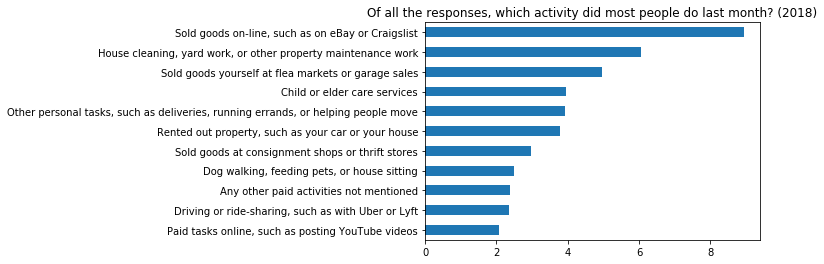

In [18]:
# For the easiest comparison, a combined data for temporary services and income through selling

everything = pd.concat([sell, serv]) #combine dataframes
tot_yes = everything['Yes'].sum() #
everything['perc_yes']=everything['Yes'].apply(lambda x: (x/11316)*100) #% of all response that said yes to the activity
#Of all the activities, what did people do the most
everything['perc_yes'].sort_values().plot('barh', title="Of all the responses, which activity did most people do last month? (2018)")

Observations: From the responses, looks like in an given month, most people earn extra income through selling goods and helping out with housework while the least number of people who responded engage in uber driving and posting YouTube video. 

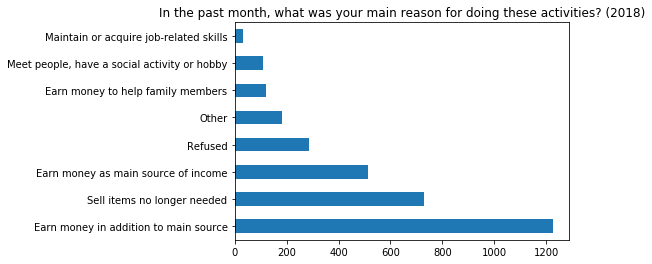

In [19]:
#Plot the reason for people doing an additional job
reduced_18['GE11'].value_counts().plot('barh', title='In the past month, what was your main reason for doing these activities? (2018)')

Observation: Additonal income is the number one reason for an "additional job" followed by earning money for things one doesnt need. Though it is not the highest number of responses, a considerable number of people engage in activities like the ones mentioned above to earn money as main source income.

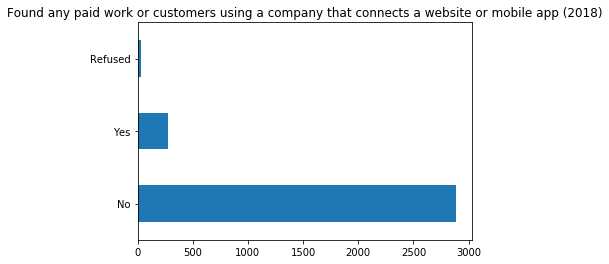

In [20]:
#Some people doing these activities use companies that connect them directly with customers using a website or mobile app. Last month, did you find any paid work or customers using a company like this?
reduced_18['GE5'].value_counts().plot('barh', title='Found any paid work or customers using a company that connects a website or mobile app (2018)')

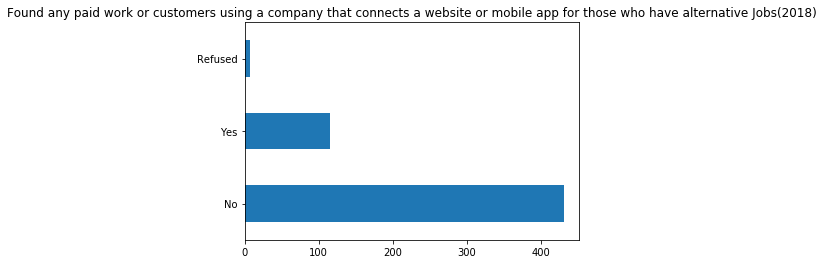

In [21]:
#Filter responses to only those who have an additional job and plot the same question.
alt_job_18 = reduced_18[reduced_18['D4'] == 'Yes']
alt_job_18['GE5'].value_counts().plot('barh', title='Found any paid work or customers using a company that connects a website or mobile app for those who have alternative Jobs(2018)')

Observation: It was surprising to see that so many more people do not use apps that connect to customers in 2018 to get some of the gig activities mentioned. The data is filtered out to consider only those responses that have an additional job and we see that the difference reduces but the responses are still overwhelmingly do not use apps/websites to connect to customers and jobs.

## Discussion

###### Interpretation

From the above analysis and observation, it seems the initial hypothesis, that gig economy is conventionally interpreted as an emerging phenomenon that is driven by employees that are motivated by flexible schedule and additional income and enabled by technology stands true. While looking at the twitter data, the frequency of words analysis clearly shows that the conversations include high mentions of technology companies that support gig work such as uber, doordash, ubereats and as well as words that indicate the phenomenon’s novelty and growth such as new, futureofwork, next, are also prevalent. My initial intuition was that there might be more fear or negativity in the sentiments of the tweets. However, there was no strong evidence supporting that. Though, an exploratory read through of the data, sentiment distribution as well as high frequency of terms like taxes, pay, important show that there are of course people who are concerned about the overall impact.  

The emergence of gig economy as a cultural shift in workplace conventions is at point that many people are taking notice and are concerned about its impact. As suggested earlier in the report, just the fact that granularity of additional job activities is a big part of the Federal Reserve Survey is indicative of the government, employers and employees are interested in how this plays out. According to a Forbes article, “the Bureau of Labor Statistics reported that 55 million people in the U.S. are “gig workers,” which is more than 35% of the U.S. workforce. That number is projected to jump to 43% by 2020” (Swaniker). Projections like this are quite common these days. People are trying to gauge the size of this fluid market to better prepare for it, however, a big limitation in systematically doing so is the variation in what constitutes as a ‘gig worker’. According to Gig Economy Data Hub, an initiative by the ILR School and the Future of Work Initiative, “one in ten workers rely on gig work for their primary income” and “one percent of workers regularly use online platforms to connect with work opportunities” (“How Many”). Such statistics as well as the results of the SHED question on use of apps for work opportunities, paint a different picture from the apparent interpretation on Twitter. It is not a major tech enabled new phenomenon but maybe a slowly changing shift in views on employment and work-life choices. 

From the analysis conducted here, it is evident that gig economy is a recognizable legisign among general population, yet the interpretation has a disconnect from the one upheld by academics and industry experts. 

###### Effectiveness of Understanding ‘Gig Economy’ Interpretant using Twitter Data

Twitter is an open social platform that requires minimal effort to participate in, so people from diverse groups with different motivations may post on it. Considering gigeconomy is a hashtag that generates many tweets a day, it is easy to accept that it is a symbolic sign vehicle that has a common interpretant. While qualitative methods such as surveys and interviews can be used to get a more in-depth answer to get a full sense of how an individual interprets ‘gig economy’, these are limited by the number of random sample one can reach out to. In the twitter data, people are not sharing what they think gig economy is, but their understanding is implicit. This is the true power of using computational method and digital data. 

###### Alternate Ideas

One can argue, that the interpretant of ‘gig economy’ is not different in different circles but incomplete in all cases. It is ambiguous nature of the term that is driving the differences. However, from readings on the gig economy and as seen in the analysis this does not seem viable. If it was a problem of ambiguity, a higher portion of the tweets would focus on the traditional, freelance jobs and its concerns and more questions on the survey would focus on technology. But here it seems like depending on the audience and where one learns about the term might influence what they interpret it like. 

Terms like ‘gig economy’ are coined by experts on the matter but conventionalized by influencers and propagated by media. Therefore, it is not surprising a variation of interpretation could occur, especially among two non-overlapping circles. Understanding the rise and impact of a workplace culture shift is relevant to everyone as in one way or the other, every individual is affected by it but not everyone is concerned or even acquainted with the big picture surrounding it.

###### Limitations
The biggest limitation of this analysis is the short time frame over which the twitter data is collected. To really understand the growth of a cultural phenomenon, an expansive temporal data is needed. In a month’s span it is quite possible that the twitter conversation was dominated by a particular issue or a current event. Additionally, the voices in the twitter conversation are assumed to be diverse and somewhat representative of a “lay person” conversation. However, that may not be the case (especially in a small dataset). The tweets could predominantly be from businesses who want to promote a product or activists or bloggers that want to share their perspective on a latest trend.  It would be beneficial to categorize who tweeted and from what capacity as well as add context to the words to gauge the interpretation.  If the conversation was dominated by people you are trying to promote or debunk uber or say a life coach promoting the flexible living, the approach used is certainly susceptible. I believe by expanding the data and correcting for the above-mentioned issues, using something as simple as term count on tweets could be very effective.

## Conclusion

In this report, frequency count of words in twitter data with #gigeconomy is compared with responses from survey data on economic decision making collected by Federal Reserve.  From the analysis, it can be seen that conventional interpretant of ‘gig economy’ is different from the characterization of this phenomenon by industry experts and academics. In a ‘textbook’ sense, gig economy includes any temporary job that is contracted independently but very frequently it can be interpreted as increase of flexible service-oriented jobs such as Uber driving or deliveries that are enabled by technology. When twitter data is analyzed, it appears that this interpretant rings true but looking at the survey data, looks like ridesharing is one of the less common alternative jobs and few people use apps to get connected with customers. The discrepancy may be due to how the concept is conventionalized in the group among which one socializes.

Economic activities influence social norms and vice versa. Looking at what people think regarding the economy and how they view the work in life is an interesting and an important question in the social sciences. In matters of economic activity, if the reality is different from the perception, what could be the unintended consequence of it? A thorough understanding of what causes a deviation in conventional interpretation from the intended meaning would be extremely helpful in predicting the actions and impact of major cultural transformation in areas such as workforce. 

## References

Buchler, Justus. Philosophical Writings of Peirce. Dover Publications, 1955.

“How Many Gig Workers Are There?” GigEconomyData.org, https://www.gigeconomydata.org/basics/how-many-gig-workers-are-there.

Rouse, Margaret. “What Is Gig Economy? - Definition from WhatIs.com.” WhatIs.com, https://whatis.techtarget.com/definition/gig-economy.

Swaniker, Peter. “What Are The Pros And Cons Of The Gig Economy?” Forbes, Forbes Magazine, 8 Jan. 2019, https://www.forbes.com/sites/quora/2019/01/08/what-are-the-pros-and-cons-of-the-gig-economy/#3a8aa40d1388.